# Fake reviewer: Inferential Statistics

**Main Concepts:** Apply inferential statistics and hypothesis testing

**Learning Objectives:**
 - Understand the fundamentals of statistical inference and hypothesis testing
 - Perform hypothesis testing for numeric and categorical data to identify statistical significance

## Concepts to Think About

**Potential Solution:** 6 Clues That an Online Review Might Be Fake

 1. There’s no information about the reviewer. Users who only post a small number of reviews or have no profile information or social connections are more likely to be fibbing.

2. The opinions are all-or-nothing. Fabricated reviews tend to be more extreme. Five- and one-star reviews more likely to be fake than others,” Luca says. 

3. Several are posted at once. A company paid for a batch of reviews, all of which were uploaded at roughly the same time. “Suddenly a product or company with no reviews or one every few months will have five in a row all mentioning something similar, from the same day,” she says.

4. They don’t mention details. The Cornell team found that fake hotel reviewers included less description of the physical space of a guest room or other parts of a hotel; instead, they often talked about the people they were supposedly traveling with or the reason for their trip. (They also used the word “I” a lot more.) 

5. They use smaller words. we’re telling a lie, our vocabulary tends to suffer because we’re already expending mental energy on the fabrication. As a result, fake reviews are characterized by shorter words.

6. They’re very short. Brevity can also be suspect when it comes to the review itself, Luca says. “One of the markers of real reviews is someone has taken the time to write something meaningful.” Especially since fake review mills may only pay a few dollars (or less) per review, there’s an incentive for writer to dash them off quickly. 

**Project Question:** Based on the above concerns is there a way to find relation among different aspects in fake reviewers. 

**Questions for Concern:** 
1. Is there a correlation between user_id and bussiness_id reviewed ?
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
 - Most Important Variable: Are fake reviewers more prone to certain bussiness?
2. Are there strong correlations between user_id and user_id of friends?
3. Is there a relation between the length of review and number of reviews.

**Note:** *The data was found from the “Human Resources Analytics” dataset provided by Kaggle’s website. https://www.kaggle.com/ludobenistant/hr-analytics*

**Note:** THIS DATASET IS SIMULATED

In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF 
import seaborn as sns
userdatapath = '/home/titli/Documents/Springboard1/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/dataset/review.json'
numsamples=200
rowsamples=20

In [2]:
fakerows=[0,8,12,15,19,25,28,29,45,47,53,54,65,71,174,85,87,94,101,106,114,126,127,\
         128,136,142,149,153,155,167]
realrows=[1,2,3,4,5,6,7,9,10,13,17,18,21,24,26,27,30,31,32,33,34,35,36,37,38,39,40,42,43,44]

In [3]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)
inter1=[]
inter2=[]
for row in fakerows:
    line1= old.iloc[row]
    inter1.append(line1)
faker=pd.DataFrame(inter1)
#faker.set_index('user_id')

for row in realrows:
    line2= old.iloc[row]
    inter2.append(line2)
real=pd.DataFrame(inter2)
#real.set_index('user_id')

In [4]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [5]:
user_ids1 = real['user_id'].iloc[:30].values.tolist()
user_ids2 = faker['user_id'].iloc[:30].values.tolist()
review_texts1 = getreviews(user_ids1)
review_texts2 = getreviews(user_ids2)
df1 = []
for k in range(0,30):
    df1.append({'rev_length': len(review_texts1['text'].iloc[k])})
revlen1=pd.DataFrame(df1)
df2 = []
for k in range(0,30):
    df2.append({'rev_length': len(review_texts2['text'].iloc[k])})
revlen2=pd.DataFrame(df2)

<font color='purple'>The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.
Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features.</font>

In [6]:
frn = sum(faker['review_count'])/30
rrn = sum(real['review_count'])/30
print('Average number of reviews by fakers is {:.3}'.format(frn)+ \
      ' Average number of reviews by real people is {:.3}'.format(rrn))

Average number of reviews by fakers is 10.9 Average number of reviews by real people is 3.77


In [8]:
P1= frn/100
var_f=(P1*(1-P1)/30)
P2=rrn/100
var_r=(P2*(1-P2)/30)
print('Variance in percentage of reviews for fakers is {:.3} '.format(var_f)+ \
      ' variance in percentage of real people is {:.3} '.format(var_r))
## Sampling Distribution P1-P2 variance
var_b_w= var_f + var_r
std_b_w=np.sqrt(var_b_w)

print('Variance in sample distribution is {:.3} '.format(var_b_w)+ \
      ' and standard deviation in sample distribution is {:.3} '.format(std_b_w))

Variance in percentage of reviews for fakers is 0.00325  variance in percentage of real people is 0.00121 
Variance in sample distribution is 0.00445  and standard deviation in sample distribution is 0.0667 


This is a binary response type of problem (1,0) with discrete variable and a Bernoulli distribution or binomial distribution. However, testing the difference between the "percentage called back" for each race will follow a normal distribution  and hence CLT can be applied. The requirements for CLT is that the samples must be randomly drawn, and be representative of the population. Conversely since sample size **n** is > 30, z-statistics is more appropriate that t-statistics.

A two-sample z-test can be used to test the difference between two population proportions
p_1 and p_2 when a sample is randomly selected from each population. The test statistic
is
<br>
z = $\frac{(\hat p_1 - \hat p_2) - (p_1 - p_2)}{\sqrt{\bar{p}\bar{q}(\frac{1}{n_1}+\frac{1}{n_2})}}$

Where:

* $\bar{p} = \frac{x_1 + x_2}{n_1 + n_2}$

* $\bar{q} = 1 - \bar{p}$

* $\hat p_1 = \frac{x_1}{n_1}$

* $\hat p_2 = \frac{x_2}{n_2}$

* $x_1$, $x_2$ : number of success in each sample.

* $p_1$, $p_2$:Population proportions.

* $\hat p_1$, $\hat p_2$  :Sample proportions of successes.

### The null hypotheses
Ho: There is no difference between fakers and real people reviews.
<br>
H1: There is difference between fakers and real people reviews.
<br>
Since the sample size is > 30 z-statistic is appropriate.
#### Frequentist statistical approaches of Z-statistics

In [9]:
#(p1-p2)
difference = P1 - P2
n1=30
n2= 30
#calculate p-bar


p_bar = (sum(faker['review_count']) + sum(real['review_count']))/ (n1 +n2)/100
#calculate q-bar
q_bar = 1 - p_bar
#calculate p-hat 1
p_hat_1 = np.divide(sum(faker['review_count']),n1)
#calculate p-hat 2
p_hat_2 = np.divide(sum(real['review_count']),n2)
x = np.add(np.divide(1,n1),np.divide(1,n2))
#calculate z-score
z = (p_hat_1 - p_hat_2) / np.sqrt(p_bar * q_bar * x)
#calculate p-value
p = (1 - stats.norm.cdf(z)) * 2
print('The z-score is: {}\nThe p-value is: {}'.format(z,p))

The z-score is: 106.36443888383319
The p-value is: 0.0


#### Margin of Error
z * $\sqrt{\bar{p}\bar{q}(\frac{1}{n_1}+\frac{1}{n_2})}$

where z is the z-score for the desired confidence interval (critical values) e.g. if you want the z score for 95% confidence interval, you can reference the table [here](http://www.statisticshowto.com/probability-and-statistics/find-critical-values/#CommonCI) and see that the z score for this critical value is 1.96

In [10]:
moe = 1.96 * np.sqrt(p_bar * q_bar * x)
print('The margin of error is: {:.4}'.format(moe))

The margin of error is: 0.1321


#### Confidence Interval values
Using the margin of error, we can take our sample difference, add and subtract the m.o.e and establish (in this case) the 95% confidence interval. 

* Confidence Interval = ($p_1 - p_2$) $\pm$ (margin of error)

In [11]:
ci = [(difference-moe), (difference+moe)]
print('With 95% confidence, the interval range is :\n {}'.format(ci))

With 95% confidence, the interval range is :
 [-0.06039501498247786, 0.20372834831581121]


The p-value is 0 and null hypothesis gives the the same result that there is difference between number of reviews written by fakers and real people. 

## Statistical Analysis

## Histogram of Fakers and real people

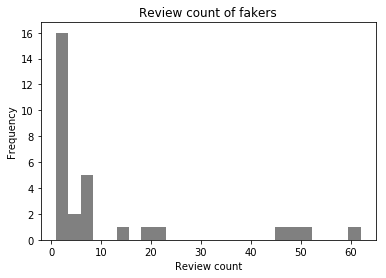

In [12]:
faker["review_count"].plot(kind='hist',color='0.5', bins = 25, title = 'Review count of fakers').set_xlabel('Review count')
st_100=round((faker["review_count"]).std(),4)

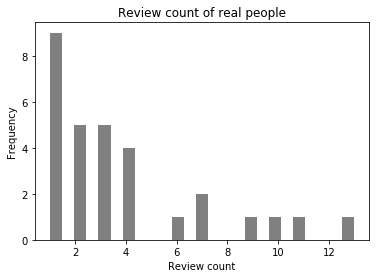

In [13]:
real["review_count"].plot(kind='hist',color='0.5', bins = 25, title = 'Review count of real people').set_xlabel('Review count')
st_100=round((real["review_count"]).std(),4)

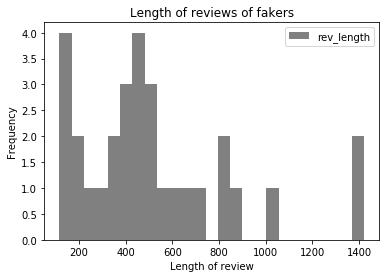

In [14]:
revlen1.plot(kind='hist',color='0.5', bins = 25, title = 'Length of reviews of fakers').set_xlabel('Length of review')
st_100=round((faker["review_count"]).std(),4)

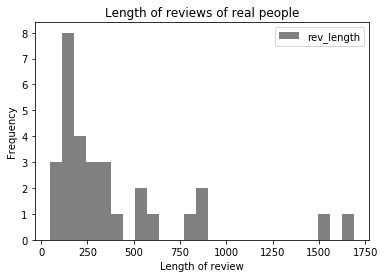

In [15]:
revlen2.plot(kind='hist',color='0.5', bins = 25, title = 'Length of reviews of real people').set_xlabel('Length of review')
st_100=round((faker["review_count"]).std(),4)